<a href="https://colab.research.google.com/github/Vishal64B/NNDL/blob/main/Vishal_Q1_NNDL_CIA_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Scenario:
The XOR gate is known for its complexity, as it outputs 1 only when the inputs are different.

This is a challenge for a Single Layer Perceptron since XOR is not linearly separable.

• Lab Task: Attempt to implement a Single Layer Perceptron in Google Colab to classify the
output of an XOR gate.
Perform the following steps:
• Create the XOR gate's truth table dataset.

• Implement the perceptron model and train it using the XOR dataset using MCP (McCulloch
Pitts) Neuron.

• Observe and discuss the perceptron's performance in this scenario.

• Implement XOR using Multi-Layer Perceptron.

Final weights: [-1.00000000e-01  1.38777878e-16]
Final bias: 8.326672684688674e-17
Single Layer Perceptron results:
Input: [0 0], Output: 1
Input: [0 1], Output: 1
Input: [1 0], Output: 0
Input: [1 1], Output: 0


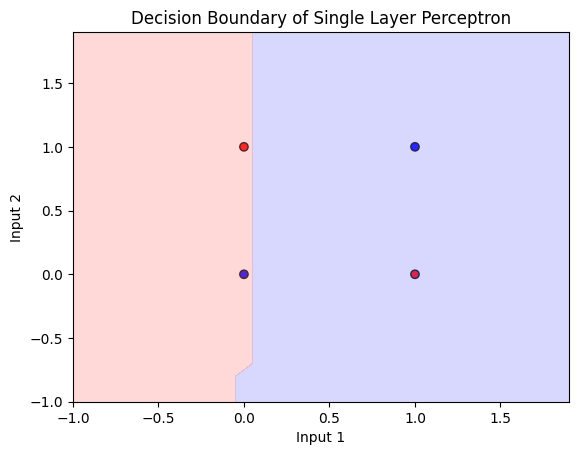

In [39]:
import numpy as np
import matplotlib.pyplot as plt

# XOR gate truth table inputs
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])

# outputs for XOR gate
y = np.array([0, 1, 1, 0])

class Perceptron:
    def __init__(self, input_size, learning_rate=0.1, epochs=100):
        # Initializing weights to 1
        self.weights = np.ones(input_size)
        self.bias = 1
        self.learning_rate = learning_rate
        self.epochs = epochs

    # Activation function
    def activate(self, x):
        return 1 if x >= 0 else 0

    # Predict output function
    def predict(self, inputs):
        sum = np.dot(inputs, self.weights) + self.bias
        return self.activate(sum)

    # Training function
    def train(self, X, y):
        for epoch in range(self.epochs):
            for inputs, label in zip(X, y):
                prediction = self.predict(inputs)

                # Updating weights and bias based on the error (label - prediction)

                self.weights += self.learning_rate * (label - prediction) * inputs
                self.bias += self.learning_rate * (label - prediction)
        print("Final weights:", self.weights)
        print("Final bias:", self.bias)

# Creating an instance of the perceptron with 2 inputs
slp = Perceptron(2)

slp.train(X, y)

print("Single Layer Perceptron results:")
for inputs in X:
    print(f"Input: {inputs}, Output: {slp.predict(inputs)}")

# plotting decision boundary
def plot_decision_boundary(X, y, weights, bias):
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', marker='o', edgecolor='k')
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
    Z = np.dot(np.c_[xx.ravel(), yy.ravel()], weights) + bias
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z >= 0, alpha=0.3, cmap='bwr')
    plt.xlabel("Input 1")
    plt.ylabel("Input 2")
    plt.title("Decision Boundary of Single Layer Perceptron")
    plt.show()


plot_decision_boundary(X, y, slp.weights, slp.bias)


# Discussion of SLP Performance for XOR

*   The perceptron's performance in solving the XOR problem is limited.
*   It struggles to converge to a solution that correctly classifies all input combinations (0,0), (0,1), (1,0), (1,1).
*   This is because XOR is not linearly separable.
A single perceptron (linear model) cannot draw a single line to properly classify all four data points.
*   To accurately solve the XOR problem, more complex models such as a multi-layered perceptron or other neural network architectures are required.

Multi-Layer Perceptron results:
Input: [0 0], Output: 0
Input: [0 1], Output: 1
Input: [1 0], Output: 1
Input: [1 1], Output: 0


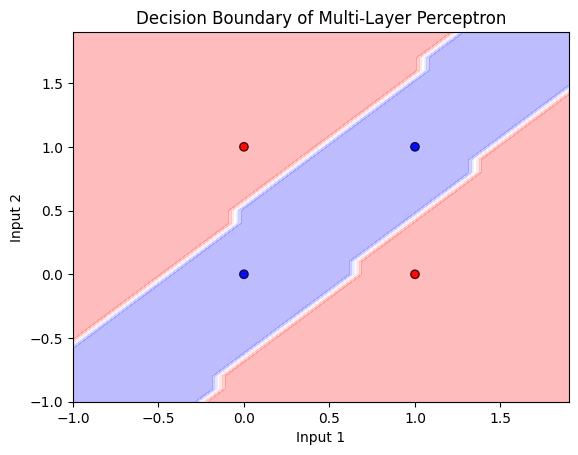

In [47]:
import numpy as np
import matplotlib.pyplot as plt

# XOR gate truth table inputs
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])

y = np.array([0, 1, 1, 0])

class MLP:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.1, epochs=20000):
        # Initializing weights for input -> hidden and hidden -> output layers
        self.weights_input_hidden = np.random.randn(input_size, hidden_size)
        self.weights_hidden_output = np.random.randn(hidden_size, output_size)
        self.bias_hidden = np.random.randn(hidden_size)
        self.bias_output = np.random.randn(output_size)
        self.learning_rate = learning_rate
        self.epochs = epochs

    # Activation function (Sigmoid)
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    # Derivative of the sigmoid function
    def sigmoid_derivative(self, x):
        return x * (1 - x)

    # Forward pass through the network
    def forward(self, inputs):
        # Input to hidden layer
        self.hidden_layer_input = np.dot(inputs, self.weights_input_hidden) + self.bias_hidden
        self.hidden_layer_output = self.sigmoid(self.hidden_layer_input)

        # Hidden to output layer
        self.output_layer_input = np.dot(self.hidden_layer_output, self.weights_hidden_output) + self.bias_output
        output = self.sigmoid(self.output_layer_input)
        return output

    # Backpropagation and weights update
    def train(self, X, y):
        for epoch in range(self.epochs):
            for inputs, label in zip(X, y):
                # Forward pass
                output = self.forward(inputs)

                # Calculate error at output
                output_error = label - output
                output_delta = output_error * self.sigmoid_derivative(output)

                # Calculate error at hidden layer
                hidden_error = np.dot(output_delta, self.weights_hidden_output.T)
                hidden_delta = hidden_error * self.sigmoid_derivative(self.hidden_layer_output)

                # Update weights and biases
                self.weights_hidden_output += self.learning_rate * np.outer(self.hidden_layer_output, output_delta)
                self.bias_output += self.learning_rate * output_delta
                self.weights_input_hidden += self.learning_rate * np.outer(inputs, hidden_delta)
                self.bias_hidden += self.learning_rate * hidden_delta

            # print(self.weights_hidden_output)
            # print(self.)


    def predict(self, inputs):
        output = self.forward(inputs)
        return 1 if output >= 0.5 else 0

# Creating an instance of MLP with 2 input neurons, 2 hidden neurons, and 1 output neuron
mlp = MLP(2, 2, 1)

mlp.train(X, y)


print("Multi-Layer Perceptron results:")
for inputs in X:
    print(f"Input: {inputs}, Output: {mlp.predict(inputs)}")

# Plot decision boundary for MLP
def plot_decision_boundary(X, y, model):
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', marker='o', edgecolor='k')
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

    Z = np.array([model.predict(np.array([x, y])) for x, y in np.c_[xx.ravel(), yy.ravel()]])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap='bwr')
    plt.xlabel("Input 1")
    plt.ylabel("Input 2")
    plt.title("Decision Boundary of Multi-Layer Perceptron")
    plt.show()

# Visualizing the decision boundary
plot_decision_boundary(X, y, mlp)


# Discussion of MLP Performance for XOR

*   The MLP demonstrates significantly better performance in solving the XOR problem compared to a single perceptron.
*   The MLP, with its hidden layer, can effectively learn the nonlinear relationship in the XOR data.
*   During training, the MLP adjusts its weights and biases to minimize the error and accurately classify all four input combinations (0,0), (0,1), (1,0), (1,1).
*   The hidden layer allows the MLP to create a more complex decision boundary that can separate the XOR classes, which is not possible with a linear model.
*   The use of the sigmoid activation function in both the hidden and output layers further contributes to the MLP's ability to model nonlinear relationships effectively.
